In [74]:
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    number=10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    print(x_train.shape)
    print(y_train.shape)

    x_train = x_train.reshape(number, 28*28)
    x_test  = x_test.reshape(number, 28*28)
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train/255
    x_test = x_test/255
#     x_test = np.random.normal(x_test);  # add noise
    return (x_train, y_train), (x_test, y_test)

# Load MNIST data and preprocess
(x_train, y_train), (x_test, y_test) = load_data()

print(x_train.shape)
print(y_train.shape)
# plt.imshow(x_train[0].reshape(28,28))


(10000, 28, 28)
(10000,)
(10000, 784)
(10000, 10)


In [96]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=784, activation='relu'))
model.add(Dropout(0.7));
model.add(Dense(units=400, activation='relu',name="layer1"))
# model.add(Dropout(0.7));
# model.add(Dense(units=200, activation='relu'))
model.add(Dropout(0.7));

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, batch_size=100, epochs=4)

result = model.evaluate(x_train, y_train)
print('train:',result[1])

result = model.evaluate(x_test, y_test)
print('test:',result[1])

model.summary()

Epoch 1/4
10000/10000 [==============================] - 4s 355us/step - loss: 1.0411 - acc: 0.6562
Epoch 2/4
10000/10000 [==============================] - 2s 239us/step - loss: 0.4571 - acc: 0.8588
Epoch 3/4
10000/10000 [==============================] - 2s 240us/step - loss: 0.3505 - acc: 0.8950
Epoch 4/4
10000/10000 [==============================] - 1s 78us/step
train: 0.9594
10000/10000 [==============================] - 1s 56us/step
test: 0.9413
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_9 (Dropout)          (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 400)               314000    
_________________________________________________________________
dropout_10 (Dro

In [93]:
print(model.weights)

[<tf.Variable 'dense_7/kernel:0' shape=(784, 784) dtype=float32_ref>, <tf.Variable 'dense_7/bias:0' shape=(784,) dtype=float32_ref>, <tf.Variable 'layer1_3/kernel:0' shape=(784, 400) dtype=float32_ref>, <tf.Variable 'layer1_3/bias:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'dense_8/kernel:0' shape=(400, 10) dtype=float32_ref>, <tf.Variable 'dense_8/bias:0' shape=(10,) dtype=float32_ref>]


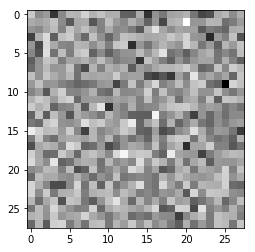

In [95]:
plt.imshow(model.get_weights()[1].reshape(28,28),cmap='Greys')

In [63]:
print(model.get_layer('layer1').get_weights()[0][0])

[ 2.07913965e-02  2.91122403e-02  3.75146270e-02 -2.51171142e-02
  6.52436353e-03  6.30563274e-02  3.95322889e-02  3.16830724e-02
  2.30431370e-02 -6.11487925e-02  6.43854737e-02  2.89726164e-02
 -3.39932367e-02 -1.69114657e-02 -4.83745150e-02  6.01715371e-02
 -7.41174296e-02  2.12287586e-02 -2.09577270e-02 -5.25563098e-02
 -8.24324489e-02  3.55006475e-03  3.17207836e-02 -3.92312780e-02
 -1.74271930e-02  2.62524690e-02  3.35786715e-02  2.02534813e-02
 -4.48188223e-02  5.51980771e-02 -3.89665030e-02 -6.01010919e-02
 -1.55920852e-02 -3.66075747e-02 -5.28617427e-02 -3.12669165e-02
 -1.73269007e-02  3.33581679e-02  2.19174847e-02  3.83625105e-02
  4.98903310e-03  5.67539111e-02  4.75026527e-03 -5.55103905e-02
  1.41853970e-02 -5.54748923e-02 -1.45376020e-03  6.53439239e-02
  7.65236542e-02  7.79639930e-02 -1.66991912e-02 -1.47971488e-03
 -7.43667334e-02  3.44150066e-02 -1.85837932e-02  6.50580302e-02
  4.16524559e-02  4.95663211e-02 -6.20111600e-02 -1.35160973e-02
  3.48033942e-02 -1.06421

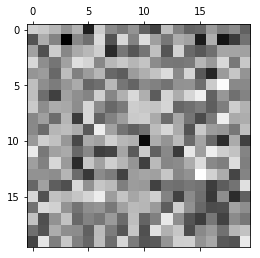

In [88]:
# for i in range(10):
plt.matshow(model.get_layer('layer1').get_weights()[1].reshape(20,20),cmap='Greys')